# Дашборд: https://public.tableau.com/views/Dashboard_Banks_Final/Dashboard1?:language=en-US&:display_count=n&:origin=viz_share_link

# Ссылка на презентацию: https://disk.yandex.ru/i/IlTXbjijFiJ3dQ

# Анализ оттока клиентов из банка «Метанпром».

Данный проект позволит определить причину оттока клиентов из банка «Метанпром», посредством проверки гипотез и сегментации, что позволит подготовить рекомендации по снижения оттока.

# Цели:

- Провести исследовательский анализ данных,
- Выделить портреты клиентов, которые склонны уходить из банка,
- Сформулировать и проверить статистические гипотезы.

# Задачи:

#### Проанализировать клиентов регионального банка и выделить сегменты клиентов, которые склонны уходить из банка.
#### Проверить гипотезу различия дохода между теми клиентами, которые ушли и теми, которые остались.
#### Сформулировать и проверить статистическую гипотезу относительно представленных данных.

# Описание датасета

Датасет содержит данные о клиентах банка «Метанпром». Банк располагается в Ярославле и областных городах: Ростов Великий и Рыбинск.

Колонки:

- `user_id` — идентификатор пользователя;
- `score` — баллы кредитного скоринга;
- `city` — город;
- `gender` — пол;
- `age` — возраст;
- `equity`  — балловая оценка собственности;
- `balance` — баланс на счёте;
- `products` — количество продуктов, которыми пользуется клиент;
- `credit_card` — есть ли кредитная карта среди продуктов;
- `last_activity` — активность за последнее время;
- `est_salary` — регулярный доход;
- `churn` — ушёл или нет.



# Декомпозиция:
1. Загрузка данных и подготовка к исследованию:
   - Загрузка данных из  источников
   - Очистка данных от ошибок, дубликатов
   - Преобразование данных в удобный формат для анализа

2. Подготовка данных (анализ пропусков) :
   - Идентификация и обработка пропущенных значений
   - Анализ распределения пропусков в данных
   - Разработка стратегии заполнения пропущенных значений (например, средними значениями, медианами, интерполяцией)
   - Кодирование категориальных переменных для использования в анализе, если они не приведут к потере логики данных

3. Исследовательский анализ данных:
   - Анализ распределений различных переменных
   - Анализ распределения оттока в разрезе различных факторов (например, возраст, пол, доход)
   - Создание портретов клиентов и сравнение различных групп клиентов
   - Корреляционный анализ для выявления взаимосвязей между переменными

4. Проверка статистических гипотез:
   - Формулировка и проверка минимум двух нулевых гипотез (H0)
   - Использование соответствующих статистических тестов для проверки гипотез (например, t-тест, анализ дисперсии)

5. Сегментация на основе стратегических показателей:
   - Применение методов сегментации данных  для разделения клиентов на группы
   - Определение характеристик и поведения каждой группы клиентов
   - Оценка оттока в каждой сегментированной группе клиентов
   - Идентификация наиболее уязвимых сегментов с высоким уровнем оттока
   - Определение причин оттока в каждой сегментированной группе по возможности

6. Выводы и рекомендации для заказчика:
   - Анализ результатов сегментации и исследовательского анализа
   - Разработка рекомендаций для улучшения стратегии удержания клиентов в каждом сегменте


# 1. Загрузка данных и подготовка к исследованию:



##  Загрузка данных из  источников

In [1]:
pip install phik

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import mannwhitneyu
from scipy import stats as st
import math as mth
from matplotlib import pyplot as plt
from plotly import graph_objects as go
import warnings
import phik
from phik.report import plot_correlation_matrix
from phik import report

warnings.filterwarnings('ignore')
plt.rcParams.update({'figure.autolayout': True})
pd.set_option('display.max_columns', None)

In [3]:
path = "https://drive.google.com/uc?export=download&id=1-U61mhTz_N1ARjy2XSAZ7IlQqGjeqP0F"
data = pd.read_csv(path)

## Преобразование данных в удобный формат для анализа

In [4]:
data.info()
data.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   USERID         10000 non-null  int64  
 1   score          10000 non-null  float64
 2   city           10000 non-null  object 
 3   gender         10000 non-null  object 
 4   age            9974 non-null   float64
 5   equity         10000 non-null  int64  
 6   balance        7705 non-null   float64
 7   products       10000 non-null  int64  
 8   credit_card    10000 non-null  int64  
 9   last_activity  10000 non-null  int64  
 10  EST_SALARY     10000 non-null  float64
 11  churn          10000 non-null  int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 937.6+ KB


,USERID,score,city,gender,age,equity,balance,products,credit_card,last_activity,EST_SALARY,churn
0,183012,850.0,Рыбинск,Ж,25.0,1,59214.82,2,0,1,75719.14,1
1,146556,861.0,Рыбинск,Ж,37.0,5,850594.33,3,1,0,86621.77,0
2,120722,892.0,Рыбинск,Ж,30.0,0,NaN,1,1,1,107683.34,0
3,225363,866.0,Ярославль,Ж,51.0,5,1524746.26,2,0,1,174423.53,1
4,157978,730.0,Ярославль,М,34.0,5,174.00,1,1,0,67353.16,1
5,202305,856.0,Рыбинск,М,56.0,4,863687.24,3,1,0,156619.80,0
6,177259,807.0,Ярославль,Ж,39.0,3,405042.44,3,0,1,103838.32,0
7,218868,825.0,Ярославль,Ж,38.0,4,458145.40,2,1,1,68085.48,0
8,211686,923.0,Ярославль,М,54.0,5,1206337.87,2,1,0,155371.79,0
9,133130,906.0,Ярославль,Ж,67.0,0,NaN,1,0,1,238055.53,0


Типы данных нам подходят и не затруднят анализ

### Преобразование названий столбцов к нижнему регистру

Видим что наименования столбцов не приведены к общему стилю

In [5]:
data = data.rename(columns = {'USERID':'user_id', 'EST_SALARY':'est_salary'})
data.head()

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
0,183012,850.0,Рыбинск,Ж,25.0,1,59214.82,2,0,1,75719.14,1
1,146556,861.0,Рыбинск,Ж,37.0,5,850594.33,3,1,0,86621.77,0
2,120722,892.0,Рыбинск,Ж,30.0,0,NaN,1,1,1,107683.34,0
3,225363,866.0,Ярославль,Ж,51.0,5,1524746.26,2,0,1,174423.53,1
4,157978,730.0,Ярославль,М,34.0,5,174.00,1,1,0,67353.16,1


## Очистка данных от ошибок, дубликатов


<b>Проверка на явные и неявные дубликаты

In [6]:
data.duplicated().sum()

0

Полных дубликатов нету

Посмотрим на неявые по столбцам

In [7]:
print(data['user_id'].duplicated().sum(), 'дубликата, от общего колличества не так много, дубли можно удалить ')

73 дубликата, от общего колличества не так много, дубли можно удалить 


In [8]:
data = data.drop_duplicates(subset=['user_id'], keep=False)

In [9]:
data['city'].unique()

array(['Рыбинск', 'Ярославль', 'Ростов'], dtype=object)

In [10]:
data['gender'].unique()

array(['Ж', 'М'], dtype=object)

In [11]:
data['equity'].unique()

array([1, 5, 0, 4, 3, 2, 6, 7, 8, 9])

In [12]:
data['products'].unique()

array([2, 3, 1, 4, 5, 0])

Значения 0 не должно быть, посмотрми что это может быть

In [13]:
data[data['products']==0]

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
8957,147837,962.0,Рыбинск,Ж,79.0,3,NaN,0,0,0,25063.96,1


В строке продуктов не может быть значение 0, если человек является клиентом то обладает картой что является одним продуктом

In [14]:
data = data[data['products']!=0]

In [15]:
data['products'].unique()

array([2, 3, 1, 4, 5])

In [16]:
data['credit_card'].unique()

array([0, 1])

In [17]:
data['last_activity'].unique()

array([1, 0])

In [18]:
data['churn'].unique()

array([1, 0])

# 2. Подготовка данных (анализ пропусков) :


## Идентификация и обработка пропущенных значений


In [19]:
data.isna().sum()

user_id             0
score               0
city                0
gender              0
age                 3
equity              0
balance          2245
products            0
credit_card         0
last_activity       0
est_salary          0
churn               0
dtype: int64

##  Анализ распределения пропусков в данных


In [20]:
round(data.isna().sum()/len(data)*100,1)

user_id           0.0
score             0.0
city              0.0
gender            0.0
age               0.0
equity            0.0
balance          22.8
products          0.0
credit_card       0.0
last_activity     0.0
est_salary        0.0
churn             0.0
dtype: float64

In [21]:
data[data['age'].isna()]

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
3091,138660,836.0,Ростов,Ж,NaN,5,294315.53,2,0,1,63310.22,1
4912,210674,834.0,Рыбинск,М,NaN,1,238330.52,2,0,1,93775.06,0
7345,184913,829.0,Ярославль,Ж,NaN,3,188648.77,2,0,1,75206.90,0


Пропусков мало, можно удалить эти строки

In [22]:
data = data.dropna(subset=['age'])

Посмотрим связан ли отток с пропуском в балансе

In [23]:
data[data['balance'].isna()]['churn'].value_counts()

0    2233
1      12
Name: churn, dtype: int64

Только в 12 строках пропуск мог быть из за ухода из банка

In [24]:
data.assign(missing = data.balance.isna()).corr()['missing'].drop('missing').sort_values(ascending=False,key=abs)

equity          -0.708612
products        -0.485806
est_salary       0.309332
churn           -0.246553
credit_card      0.157297
score            0.138459
last_activity    0.029641
age             -0.028065
user_id          0.002047
balance               NaN
Name: missing, dtype: float64

Видим средний коэффициент отрицательной корреляции к столбцу equity, проверим его

In [25]:
data['distribution'] = 'пропуск'
data.distribution = data.distribution.mask(data.balance > 0, 'указан')

In [26]:
display(data.groupby(['equity', 'distribution']).user_id.count().to_frame().rename(columns={'user_id':'count'}))

count
equity distribution       
0      пропуск        2132
       указан          405
1      пропуск         114
       указан          654
2      пропуск           1
       указан         1042
3      указан         1525
4      указан         1822
5      указан         1891
6      указан          157
7      указан           77
8      указан           17
9      указан           13

Видно что при отсутствии баллов оценки собственности, больше всего пропусков

Можно предположить что при отстутсвии баллов собственности, пропуски в balance равны 0

In [27]:
display(data.groupby(['products', 'distribution']).user_id.count().to_frame().rename(columns={'user_id':'count'}))

count
products distribution       
1        пропуск        1907
         указан         1380
2        пропуск         312
         указан         4755
3        пропуск          28
         указан          993
4        указан          457
5        указан           18

Так же видим что у пользователей с 1 продуктом много пропусков

In [28]:
display(data.groupby(['city', 'distribution']).user_id.count().to_frame().rename(columns={'user_id':'count'}))

count
city      distribution       
Ростов    пропуск         235
          указан         1181
Рыбинск   пропуск         567
          указан         2053
Ярославль пропуск        1445
          указан         4369

In [29]:
data = data.drop('distribution', axis=1)



Анализ позволяет сделать следующие выводы о пользователях, в записях о которых содержится пропуск:

они имеют более низкие оценки собственности;
они пользуются  меньшим числом продуктов;
В Ярославле больше всего пропусков.

Так как отток никак не связан и не удалось однозначно определить природу пропусков, поэтому было решено оставить все на месте.

##  Разработка стратегии заполнения пропущенных значений (например, средними значениями, медианами, интерполяцией)


In [30]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
user_id,9850.0,171662.782741,3.368617e+04,94561.0,142607.0000,172505.50,200979.000,2.291450e+05
score,9850.0,848.495635,6.539526e+01,642.0,802.0000,852.00,899.000,1.000000e+03
age,9850.0,42.751371,1.218379e+01,18.0,33.0000,40.00,51.000,8.600000e+01
equity,9850.0,2.630051,1.977739e+00,0.0,0.0000,3.00,4.000,9.000000e+00
balance,7605.0,824091.747297,1.983031e+06,0.0,294797.3900,523685.55,975654.990,1.191136e+08
products,9850.0,1.868223,7.887261e-01,1.0,1.0000,2.00,2.000,5.000000e+00
credit_card,9850.0,0.680609,4.662643e-01,0.0,0.0000,1.00,1.000,1.000000e+00
last_activity,9850.0,0.521523,4.995619e-01,0.0,0.0000,1.00,1.000,1.000000e+00
est_salary,9850.0,147605.693946,1.390100e+05,2546.3,75100.6875,119493.37,174497.515,1.395064e+06
churn,9850.0,0.179492,3.837836e-01,0.0,0.0000,0.00,0.000,1.000000e+00


In [31]:
data[data['est_salary']<10000]['user_id'].count()

19

In [32]:
data[data['est_salary']<10000]['balance']

505          73.00
1700       5750.92
1753       7703.05
1883     373070.37
1988     118438.82
2174     294375.63
2186     325483.52
2663     631805.72
3606    1027438.02
3689     121065.39
4799     105603.12
4860     277249.69
6044     226648.06
6087      99885.68
7637     263390.68
8783      77092.89
9124     542971.64
9299     150934.62
9365     223228.01
Name: balance, dtype: float64

Несмотря на низкую доходность, у таких аккаунтов есть средства на балласнсе

In [33]:
data.reset_index()

,index,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
0,0,183012,850.0,Рыбинск,Ж,25.0,1,59214.82,2,0,1,75719.14,1
1,1,146556,861.0,Рыбинск,Ж,37.0,5,850594.33,3,1,0,86621.77,0
2,2,120722,892.0,Рыбинск,Ж,30.0,0,NaN,1,1,1,107683.34,0
3,3,225363,866.0,Ярославль,Ж,51.0,5,1524746.26,2,0,1,174423.53,1
4,4,157978,730.0,Ярославль,М,34.0,5,174.00,1,1,0,67353.16,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9845,9995,120553,814.0,Рыбинск,М,27.0,1,78144.65,1,0,1,18943.64,0
9846,9996,139170,894.0,Ярославль,М,46.0,0,NaN,1,1,0,196898.29,0
9847,9997,115639,903.0,Ярославль,М,24.0,0,NaN,2,1,1,108905.09,0
9848,9998,148700,777.0,Ярославль,Ж,68.0,3,865457.97,3,0,1,86874.90,0




Мы видим, что в большинстве столбцов данные нормально распределены: среднее отличается от медианы незначительно, а стандартное отклонение невелико.

У 19 записей регулярный доход меньше 10000, считаю, что с этим можно ничего не делать, т.к. это может быть второй или третий счет, на который падают регулярно по 10000 и раз в 3 месяца человек докидывает деньги.



##  Кодирование категориальных переменных для использования в анализе, если они не приведут к потере логики данных

Создадим отдельные столбцы для городов

In [34]:
data['new_city'] = data['city']
data = pd.get_dummies(data, columns = ['new_city'])
data = data.rename(columns = ({'new_city_Ростов':'Ростов', 'new_city_Рыбинск':'Рыбинск','new_city_Ярославль':'Ярославль'}))
display(data.head())

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,Ростов,Рыбинск,Ярославль
0,183012,850.0,Рыбинск,Ж,25.0,1,59214.82,2,0,1,75719.14,1,0,1,0
1,146556,861.0,Рыбинск,Ж,37.0,5,850594.33,3,1,0,86621.77,0,0,1,0
2,120722,892.0,Рыбинск,Ж,30.0,0,NaN,1,1,1,107683.34,0,0,1,0
3,225363,866.0,Ярославль,Ж,51.0,5,1524746.26,2,0,1,174423.53,1,0,0,1
4,157978,730.0,Ярославль,М,34.0,5,174.00,1,1,0,67353.16,1,0,0,1


<b>Посмотрим распределение по возрасту

In [35]:
'''churn_by_age = data.groupby('age')['churn'].agg(['count', 'sum']).reset_index()

churn_by_age['churn_rate'] = churn_by_age['sum'] / churn_by_age['count']

mean_churn_rate = churn_by_age['sum'].sum() / churn_by_age['count'].sum()


fig, ax = plt.subplots(figsize=(10, 8))
ax.plot(churn_by_age['age'], churn_by_age['count'], label='Всего клиентов')
ax.plot(churn_by_age['age'], churn_by_age['sum'], label='Клиентов, ушедших')
ax2 = ax.twinx()
ax2.plot(churn_by_age['age'], churn_by_age['churn_rate'], color='black', label='Доля оттока')
ax2.axhline(mean_churn_rate, color='red', linestyle='--', label='Средняя доля оттока')
ax.legend(loc='upper left')
ax2.legend(loc='upper right')
ax.set_xlabel('Возраст')
ax.set_ylabel('Число клиентов')
ax2.set_ylabel('Доля оттока')
plt.show()'''

"churn_by_age = data.groupby('age')['churn'].agg(['count', 'sum']).reset_index()\n\nchurn_by_age['churn_rate'] = churn_by_age['sum'] / churn_by_age['count']\n\nmean_churn_rate = churn_by_age['sum'].sum() / churn_by_age['count'].sum()\n\n\nfig, ax = plt.subplots(figsize=(10, 8))\nax.plot(churn_by_age['age'], churn_by_age['count'], label='Всего клиентов')\nax.plot(churn_by_age['age'], churn_by_age['sum'], label='Клиентов, ушедших')\nax2 = ax.twinx()\nax2.plot(churn_by_age['age'], churn_by_age['churn_rate'], color='black', label='Доля оттока')\nax2.axhline(mean_churn_rate, color='red', linestyle='--', label='Средняя доля оттока')\nax.legend(loc='upper left')\nax2.legend(loc='upper right')\nax.set_xlabel('Возраст')\nax.set_ylabel('Число клиентов')\nax2.set_ylabel('Доля оттока')\nplt.show()"

In [36]:
'''def grouped_age(age):
    if 24 >= age >= 18:
        return '18-24'
    if 40 >= age >= 25:
        return '25-40'
    if 49 >= age >= 41:
        return '41-49'
    if 60 >= age >= 50:
        return '50-60'
    if 61 <= age:
        return '61+'

data['grouped_age'] = data['age'].apply(grouped_age)'''

"def grouped_age(age):\n    if 24 >= age >= 18:\n        return '18-24'\n    if 40 >= age >= 25:\n        return '25-40'\n    if 49 >= age >= 41:\n        return '41-49'\n    if 60 >= age >= 50:\n        return '50-60'\n    if 61 <= age:\n        return '61+'\n\ndata['grouped_age'] = data['age'].apply(grouped_age)"


Было решено не делать разбивку по возрасту на данном этапе, поэтому я закоментил код выше.

In [37]:
'''data['new_grouped_age']=data['grouped_age']
data = pd.get_dummies(data, columns = ['new_grouped_age'])
data = data.rename(columns = ({
    'new_grouped_age_18-24':'18-24', 'new_grouped_age_25-40':'25-40','new_grouped_age_41-49':'41-49','new_grouped_age_50-60':'50-60', 'new_grouped_age_61+':'61+'}))
display(data.head())'''

"data['new_grouped_age']=data['grouped_age']\ndata = pd.get_dummies(data, columns = ['new_grouped_age'])\ndata = data.rename(columns = ({\n    'new_grouped_age_18-24':'18-24', 'new_grouped_age_25-40':'25-40','new_grouped_age_41-49':'41-49','new_grouped_age_50-60':'50-60', 'new_grouped_age_61+':'61+'}))\ndisplay(data.head())"

Так же для пола

In [38]:
data['new_gender'] = data['gender']
data = pd.get_dummies(data, columns = ['new_gender'])
data = data.rename(columns = ({'new_gender_Ж':'female', 'new_gender_М':'male'}))
display(data.head())

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,Ростов,Рыбинск,Ярославль,female,male
0,183012,850.0,Рыбинск,Ж,25.0,1,59214.82,2,0,1,75719.14,1,0,1,0,1,0
1,146556,861.0,Рыбинск,Ж,37.0,5,850594.33,3,1,0,86621.77,0,0,1,0,1,0
2,120722,892.0,Рыбинск,Ж,30.0,0,NaN,1,1,1,107683.34,0,0,1,0,1,0
3,225363,866.0,Ярославль,Ж,51.0,5,1524746.26,2,0,1,174423.53,1,0,0,1,1,0
4,157978,730.0,Ярославль,М,34.0,5,174.00,1,1,0,67353.16,1,0,0,1,0,1



Была проведена катеризация городов  и полов наших клиентов

**Общий вывод:**
Мы провели предобработку данных в ходе которой проверили типы данных на их соответствие, проверены на наличие явных дубликатов, и поиск неявных дубликатов и удалением их.  Также были приведены к нижнему регистру наименования столбцов и переименованы и осуществлено закодирование данных для последующего анализа


# 3. Исследовательский анализ данных:


## Корреляционный анализ для выявления взаимосвязей между переменными

Для начала проведем анализ связей между оттоком клиентов и другими параметрами, которые представлены в датафрейме

In [39]:
interval_cols=['score', 'age', 'equity', 'balance', 'products', 'credit_card', 'last_activity', 'est_salary', 'churn', 'Ростов', 'Рыбинск', 'Ярославль', 'female', 'male']

In [40]:
data_excluded = data.drop('user_id', axis=1)
phik_overview = data_excluded.phik_matrix(interval_cols=interval_cols)
phik_overview.round(2)

,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,Ростов,Рыбинск,Ярославль,female,male
score,1.00,0.09,0.07,0.04,0.53,0.16,0.42,0.21,0.06,0.39,0.22,0.09,0.03,0.09,0.07,0.07
city,0.09,1.00,0.01,0.09,0.06,0.04,0.13,0.08,0.03,0.17,0.02,1.00,1.00,1.00,0.01,0.01
gender,0.07,0.01,1.00,0.29,0.07,0.04,0.07,0.20,0.01,0.14,0.22,0.02,0.01,0.03,1.00,1.00
age,0.04,0.09,0.29,1.00,0.04,0.02,0.14,0.16,0.09,0.36,0.18,0.07,0.06,0.10,0.29,0.29
equity,0.53,0.06,0.07,0.04,1.00,0.00,0.58,0.22,0.05,0.29,0.35,0.06,0.01,0.06,0.07,0.07
balance,0.16,0.04,0.04,0.02,0.00,1.00,0.00,0.00,0.00,0.37,0.02,0.00,0.02,0.05,0.04,0.04
products,0.42,0.13,0.07,0.14,0.58,0.00,1.00,0.27,0.11,0.22,0.26,0.04,0.09,0.11,0.07,0.07
credit_card,0.21,0.08,0.20,0.16,0.22,0.00,0.27,1.00,0.05,0.04,0.20,0.15,0.08,0.18,0.20,0.20
last_activity,0.06,0.03,0.01,0.09,0.05,0.00,0.11,0.05,1.00,0.04,0.26,0.00,0.07,0.07,0.01,0.01
est_salary,0.39,0.17,0.14,0.36,0.29,0.37,0.22,0.04,0.04,1.00,0.04,0.14,0.10,0.18,0.14,0.14


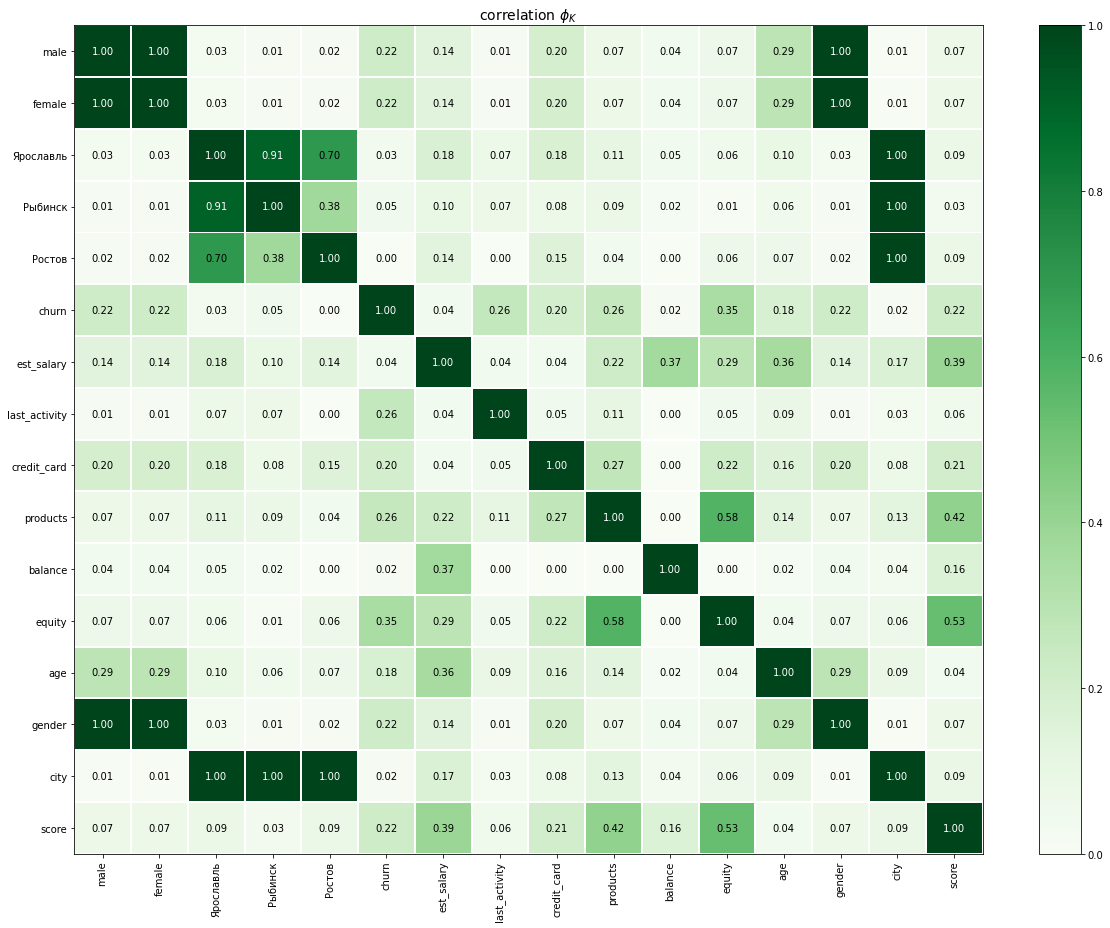

In [41]:

plot_correlation_matrix(phik_overview.values,
                        x_labels=phik_overview.columns,
                        y_labels=phik_overview.index,
                        vmin=0, vmax=1, color_map="Greens",
                        title=r"correlation $\phi_K$",
                        fontsize_factor=1,
                        figsize=(17, 13))
plt.tight_layout()

interval columns not set, guessing: ['score', 'age', 'equity', 'balance', 'products', 'credit_card', 'last_activity', 'est_salary', 'churn', 'Ростов', 'Рыбинск', 'Ярославль', 'female', 'male']


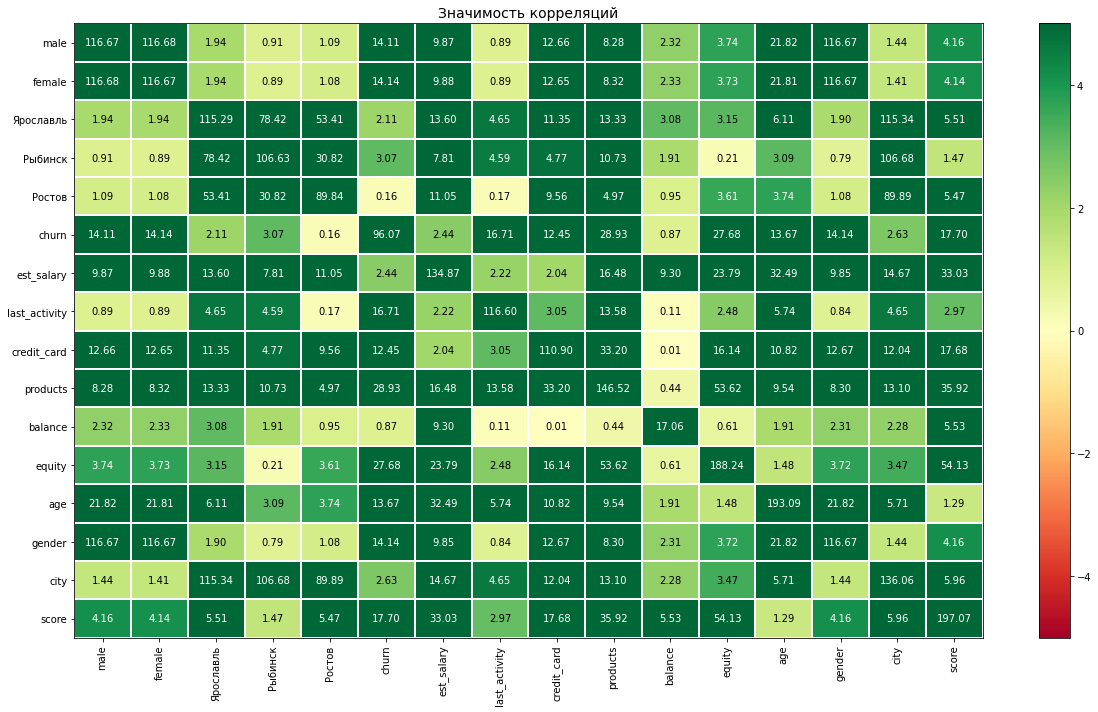

In [42]:
significance_overview = data_excluded.significance_matrix()
plot_correlation_matrix(significance_overview.fillna(0).values,
                        x_labels=significance_overview.columns,
                        y_labels=significance_overview.index,
                        vmin=-5, vmax=5, title="Значимость корреляций",
                        usetex=False, fontsize_factor=1, figsize=(17, 10))
plt.tight_layout()

По таблице видно, что наибольшая корреляция с показателем оттока клиентов у таких параметров как:
- оценка объектов собственности клиента (столбец equity),
- скоринговый рейтинг клиента (столбец score),
- количество продуктов, которыми пользуется клиент (столбец products),
- наличие кредитной карты (столбец credit_card),
- активность пользователя (столбец last_activity),
- пол пользователя (столбцы  female и male),
- возраст пользователя.



Рассмотрим эти параметры по отдельности.


## Анализ распределения оттока в разрезе различных факторов (например, возраст, пол, доход)


#### Оценка объектов собственности

,sum,count,perc
equity,,,
0,87,2537,3.429247
1,91,768,11.848958
2,164,1043,15.723873
3,315,1525,20.655738
4,449,1822,24.643249
5,560,1891,29.613961
6,54,157,34.394904
7,35,77,45.454545
8,6,17,35.294118


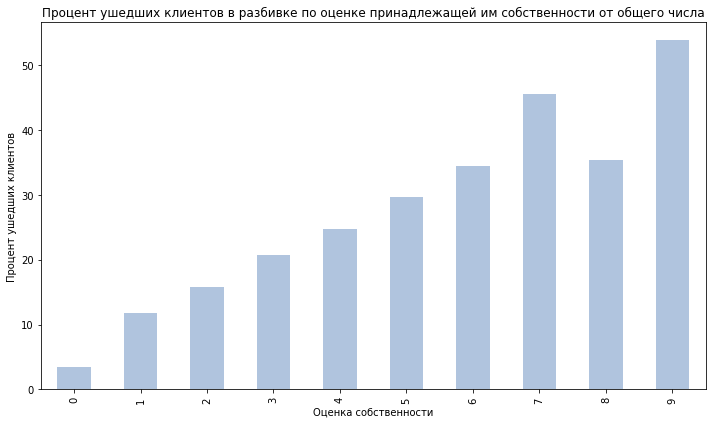

In [43]:
equity_churn = data.pivot_table (index = 'equity', values = 'churn', aggfunc = ['sum', 'count'])
equity_churn.columns = equity_churn.columns.droplevel(level=1)
equity_churn ['perc'] = equity_churn['sum']/equity_churn['count']*100

equity_churn['perc'].plot (
    kind='bar', title = 'Процент ушедших клиентов в разбивке по оценке принадлежащей им собственности от общего числа',
    xlabel = 'Оценка собственности', ylabel = 'Процент ушедших клиентов', figsize = (10,6), color = 'lightsteelblue');
equity_churn

Мы замечаем, что существует прямая связь между оценкой имущества и количеством оттока клиентов. Чем выше оценка, тем выше процент оттока клиентов. Например, процент отклика составляет около 3,5% для имущества с оценкой 0 и почти 54% для имущества с оценкой 9.

#### Скоринговый рейтинг клиента

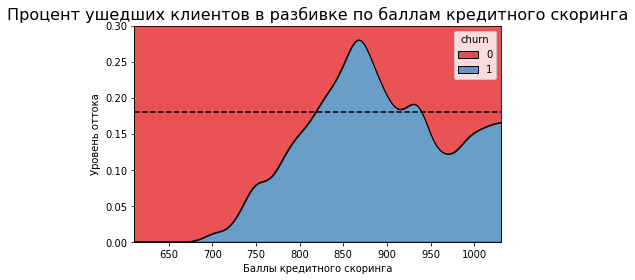

In [44]:
churn_score = pd.pivot_table(data, index='score', values='churn', aggfunc=['sum', 'count'])
churn_score.columns = ['sum', 'count']
churn_score['%'] = churn_score['sum'] / churn_score['count'] * 100
churn_score = churn_score[churn_score['sum'] == 1]
churn_mean = data['churn'].mean()

sns.kdeplot(data=data, x='score', hue='churn', multiple='fill', palette='Set1')
plt.title('Процент ушедших клиентов в разбивке по баллам кредитного скоринга', fontsize=16)
plt.xlabel('Баллы кредитного скоринга')
plt.ylabel('Уровень оттока')
plt.ylim(0, 0.3)
plt.axhline(y=churn_mean, color='black', linestyle='--')
plt.show()

Пиковое значение находится в областит 870 баллов кредитного скоринга.

#### Количество используемых продуктов

,sum,count,perc
products,,,
1,230,3287,6.997262
2,953,5067,18.807973
3,291,1021,28.501469
4,287,457,62.800875
5,7,18,38.888889


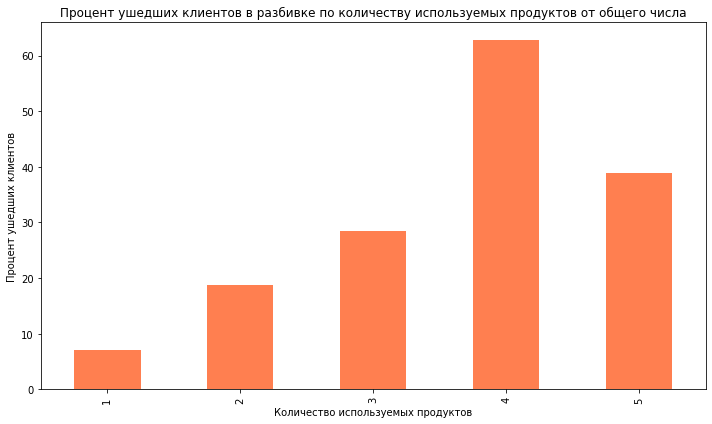

In [45]:
products_churn = data.pivot_table (index = 'products', values = 'churn', aggfunc = ['sum', 'count'])
products_churn.columns = products_churn.columns.droplevel(level=1)
products_churn ['perc'] = products_churn['sum']/products_churn['count']*100

products_churn['perc'].plot (
    kind='bar', title = 'Процент ушедших клиентов в разбивке по количеству используемых продуктов от общего числа',
    xlabel = 'Количество используемых продуктов', ylabel = 'Процент ушедших клиентов', figsize = (10,6),
    color = 'coral');
products_churn

На графике видно, что особенно много (больше половины) клиентов, использовавших 4 продукта, ушли из банка. Среди клиентов, использовавших 2,3 и 5 продуктов доля отточных находится в диапазоне 20-35%, для клиентов, использовавших 1 продукт - не превышает 10%.

#### Наличие кредитной карты

,sum,count,perc
credit_card,,,
0,792,3146,25.174825
1,976,6704,14.558473


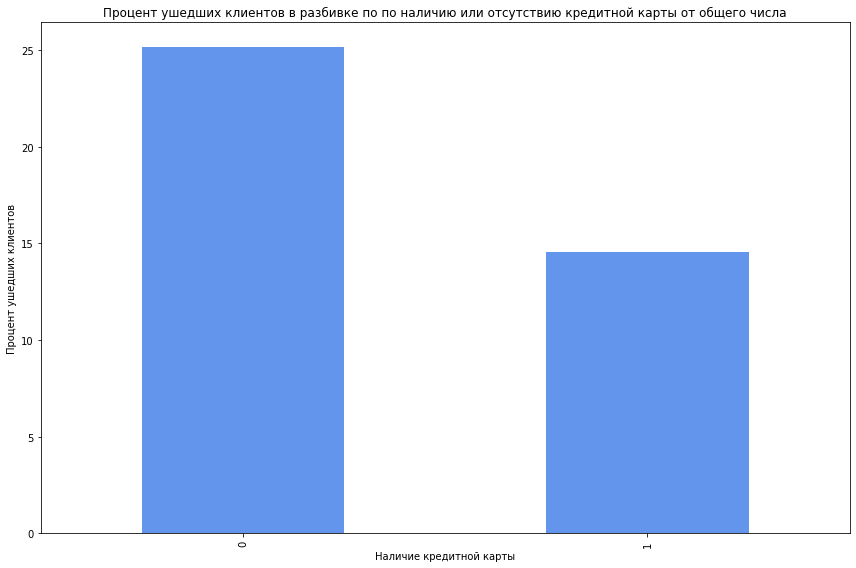

In [46]:
credit_card_churn = data.pivot_table (index = 'credit_card', values = 'churn', aggfunc = ['sum', 'count'])
credit_card_churn.columns = credit_card_churn.columns.droplevel(level=1)
credit_card_churn ['perc'] = credit_card_churn['sum']/credit_card_churn['count']*100

credit_card_churn['perc'].plot(
    kind='bar', figsize = (12,8), color = 'cornflowerblue', xlabel = 'Наличие кредитной карты',
    title = 'Процент ушедших клиентов в разбивке по по наличию или отсутствию кредитной карты от общего числа',
    ylabel = 'Процент ушедших клиентов');

credit_card_churn

Также наблюдается интересная особенность: среди тех клиентов, у кого была кредитная карта, ушло в почти 2 раза меньше, чем среди тех, у кого кредитной карты не было.

#### Пользовательская активность

,sum,count,perc
last_activity,,,
0,531,4713,11.266709
1,1237,5137,24.080202


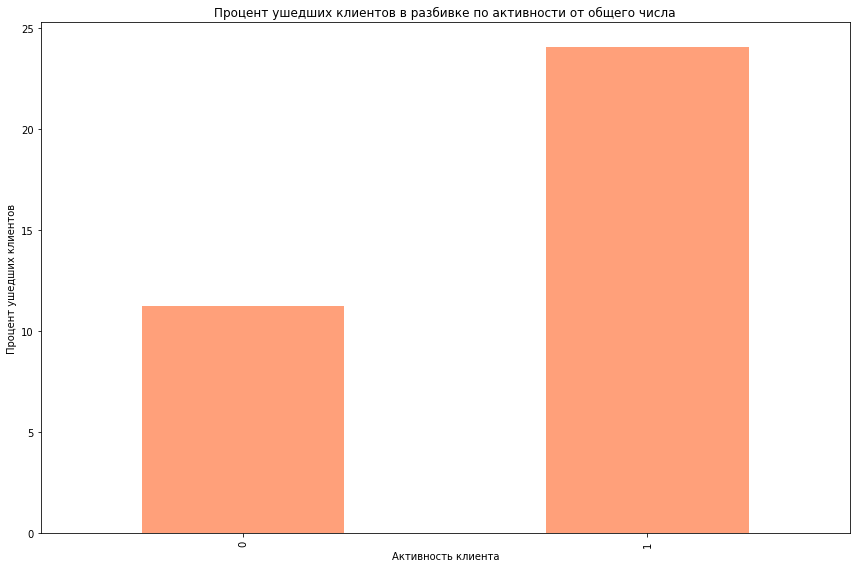

In [47]:
activity_churn = data.pivot_table (index = 'last_activity', values = 'churn', aggfunc = ['sum', 'count'])
activity_churn.columns = activity_churn.columns.droplevel(level=1)
activity_churn ['perc'] = activity_churn['sum']/activity_churn['count']*100

activity_churn['perc'].plot(
    kind='bar', title = 'Процент ушедших клиентов в разбивке по активности от общего числа', figsize = (12,8),
    color = 'lightsalmon', ylabel = 'Процент ушедших клиентов', xlabel = 'Активность клиента');

activity_churn

Здесь мы наблюдаем интересную ситуацию: у активных клиентов риск потери клиента в два раза выше, чем у неактивных клиентов, хотя общее количество активных и неактивных клиентов в выборке не отличается сильно. Возможно, это объясняется тем, что активное использование банковских продуктов повышает вероятность негативного опыта взаимодействия с банком, что в свою очередь приводит к принятию решения об отказе от услуг этого конкретного банка.

#### Пол пользователя

,sum,count,perc
gender,,,
Ж,615,4922,12.494921
М,1153,4928,23.396916


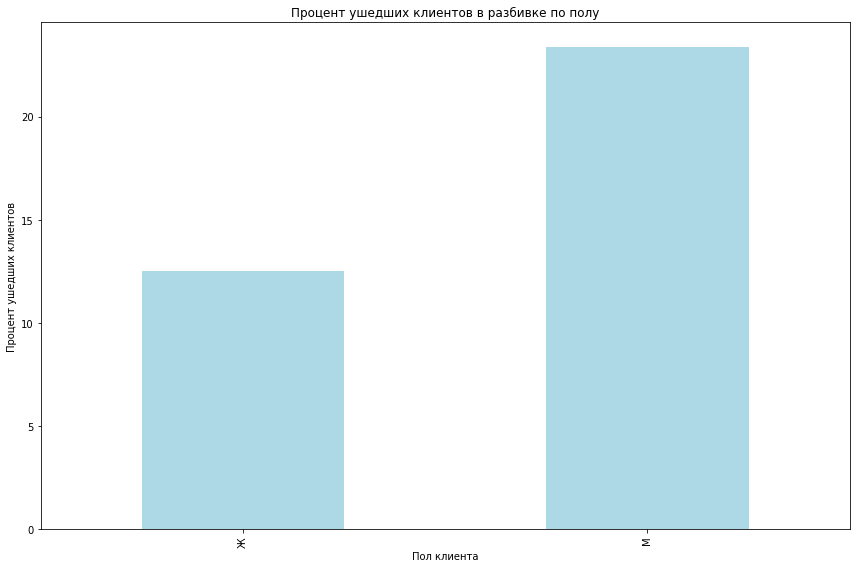

In [48]:
gender_churn = data.pivot_table (index = 'gender', values = 'churn', aggfunc = ['sum', 'count'])
gender_churn.columns = gender_churn.columns.droplevel(level=1)
gender_churn ['perc'] = gender_churn['sum']/gender_churn['count']*100

colors = ['cornflowerblue', 'lightsalmon']
mylabels = ['Не были активны','Были активны']
gender_churn['perc'].plot(
    kind='bar', title = 'Процент ушедших клиентов в разбивке по полу', figsize = (12,8), color = 'lightblue',
    xlabel = 'Пол клиента', ylabel = 'Процент ушедших клиентов');

gender_churn

Мы видим, что среди женщин доля отточных клиентов почти в два раз ниже, чем среди мужчин.

#### Возраст пользователей

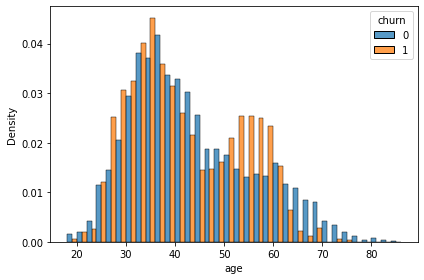

In [50]:
sns.histplot(data=data, x="age", hue="churn", multiple='dodge', stat="density", common_norm=False, binwidth=2);

По возрасту тоже наблюдается динамика на отток именно взрослого и работоспособного сегмента,25-30, 30-40-лет.50-60 лет отток выше чем те кто остался.

#### Город

На тепловой карте не было выявлено корреляции между городом и оттоком клиентов, однако мы все равно проверим этот важный параметр.

,sum,count,perc
city,,,
Ростов,265,1416,18.714689
Рыбинск,415,2620,15.839695
Ярославль,1088,5814,18.713450


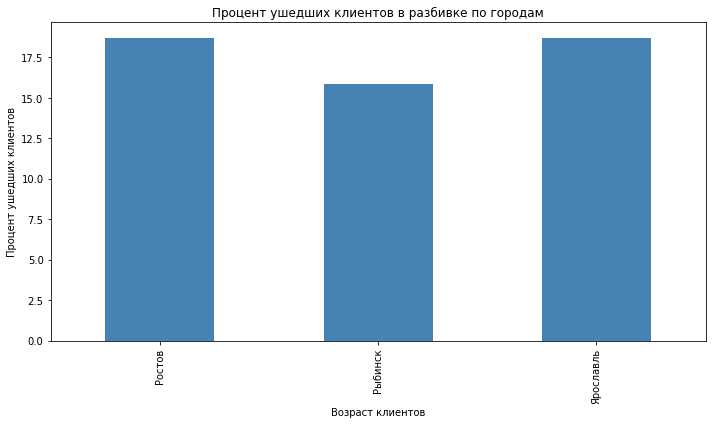

In [51]:
city_churn = data.pivot_table (index = 'city', values = 'churn', aggfunc =['sum', 'count'])
city_churn.columns = city_churn.columns.droplevel(level=1)
city_churn ['perc'] = city_churn['sum']/city_churn['count']*100

city_churn['perc'].plot (
    kind='bar', title = 'Процент ушедших клиентов в разбивке по городам',
    xlabel = 'Возраст клиентов', ylabel = 'Процент ушедших клиентов', figsize = (10,6),
    color = 'steelblue');
city_churn


Мы видим, что различие в доле ушедших клиентов между городами незначительное. Следовательно, можно подтвердить, что отток клиентов между городами происходил равномерно.

## Создание портретов клиентов и сравнение различных групп клиентов


#### Портрет №1

Пол: мужской

Возраст: 50-60

Город: любой

Оценка объектов собственности: 5 и выше

Скоринговый рейтинг: 800 и выше

Количество используемых продуктов: 3 и больше

Наличие кредитной карты: нет

Пользовательская активность: да

Теперь найдем всех клиентов, удовлетворяющих этим критериям:

In [52]:
portrait1 = data.query (
    'male==1 and equity>=5 and score >= 800 and credit_card==0 and last_activity==1 and age>50 \
    and age<= 60 and products >= 3 and churn==1')
portrait1


,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,Ростов,Рыбинск,Ярославль,female,male
399,212030,867.0,Ярославль,М,59.0,5,851896.68,3,0,1,50771.03,1,0,0,1,0,1
1292,131565,826.0,Ярославль,М,60.0,5,737821.34,3,0,1,98134.05,1,0,0,1,0,1
1420,220656,899.0,Ярославль,М,59.0,5,1682723.25,3,0,1,866547.65,1,0,0,1,0,1
1711,167518,870.0,Ярославль,М,52.0,5,775269.74,3,0,1,114384.63,1,0,0,1,0,1
2623,150673,978.0,Рыбинск,М,53.0,6,2582959.96,4,0,1,337094.41,1,0,1,0,0,1
2688,227234,832.0,Ярославль,М,55.0,5,585528.59,3,0,1,56980.75,1,0,0,1,0,1
3267,228880,890.0,Ярославль,М,54.0,5,3582411.37,3,0,1,96882.21,1,0,0,1,0,1
3861,198175,924.0,Ярославль,М,55.0,5,1675198.33,3,0,1,89820.72,1,0,0,1,0,1
4083,228827,927.0,Ярославль,М,57.0,7,3134542.35,3,0,1,93364.21,1,0,0,1,0,1
6162,153089,909.0,Ярославль,М,54.0,5,884462.90,3,0,1,874974.77,1,0,0,1,0,1


#### Портрет №2

Пол: женский

Возраст: 50-60

Город: любой

Оценка объектов собственности: 5 и выше

Скоринговый рейтинг: 800 и выше

Количество используемых продуктов: 3 и больше

Наличие кредитной карты: нет

Пользовательская активность: да

Теперь найдем всех клиентов, удовлетворяющих этим критериям:

In [53]:
portrait2 = data.query (
    'female==1 and equity>=5 and score >= 800 and credit_card==0 and last_activity==1 and age>50 \
    and age <= 60 and products >= 3 and churn==1')
portrait2


,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,Ростов,Рыбинск,Ярославль,female,male
148,122769,868.0,Ростов,Ж,58.0,5,1334745.59,4,0,1,63049.60,1,1,0,0,1,0
859,177840,802.0,Рыбинск,Ж,51.0,5,1146872.86,3,0,1,77888.51,1,0,1,0,1,0
1205,213664,807.0,Ярославль,Ж,54.0,5,478592.43,3,0,1,64332.46,1,0,0,1,1,0
3718,219312,889.0,Ярославль,Ж,60.0,5,725760.89,4,0,1,65348.47,1,0,0,1,1,0
4134,208057,856.0,Ярославль,Ж,52.0,5,1700165.08,4,0,1,153066.02,1,0,0,1,1,0
5016,210005,885.0,Ярославль,Ж,55.0,5,1316966.94,3,0,1,97938.30,1,0,0,1,1,0
6105,213759,868.0,Ярославль,Ж,59.0,5,1548910.65,3,0,1,122215.94,1,0,0,1,1,0
7328,203628,862.0,Ярославль,Ж,56.0,5,942423.50,3,0,1,63417.52,1,0,0,1,1,0
7920,119412,897.0,Ярославль,Ж,55.0,5,1847675.01,3,0,1,132865.53,1,0,0,1,1,0
8057,212509,933.0,Ярославль,Ж,51.0,5,1449619.59,3,0,1,306330.62,1,0,0,1,1,0


#### Портрет №3

Пол: любой

Возраст: от 25 до 40

Город: любой

Оценка объектов собственности: 5 и выше

Скоринговый рейтинг: 750 и выше

Количество используемых продуктов: 3 и больше

Наличие кредитной карты: нет

Пользовательская активность: да

Теперь найдем всех клиентов, удовлетворяющих этим критериям:

In [54]:
portrait3 = data.query (
    'score >= 750 and credit_card==0 and equity >= 5 and last_activity==1 and age>=25 \
    and age <= 40 and products >= 3 and churn==1')
portrait3


,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,Ростов,Рыбинск,Ярославль,female,male
72,156677,873.0,Ярославль,М,39.0,5,915959.85,3,0,1,154034.62,1,0,0,1,0,1
81,223978,850.0,Рыбинск,М,34.0,5,351583.16,4,0,1,115354.97,1,0,1,0,0,1
475,140383,908.0,Ярославль,М,33.0,5,649294.72,4,0,1,63645.46,1,0,0,1,0,1
734,170176,893.0,Ярославль,М,27.0,5,499315.41,3,0,1,30578.46,1,0,0,1,0,1
847,115095,880.0,Ярославль,Ж,34.0,5,956027.03,3,0,1,136108.13,1,0,0,1,1,0
936,134107,848.0,Ростов,М,26.0,5,218655.27,4,0,1,21935.66,1,1,0,0,0,1
980,153716,857.0,Ярославль,Ж,28.0,7,317884.70,3,0,1,91543.70,1,0,0,1,1,0
1147,226891,864.0,Ярославль,М,39.0,5,920418.77,3,0,1,253390.64,1,0,0,1,0,1
1166,194256,892.0,Ярославль,Ж,37.0,5,1182532.82,3,0,1,239069.05,1,0,0,1,1,0
1204,223416,901.0,Ярославль,М,27.0,5,1007657.77,3,0,1,94853.57,1,0,0,1,0,1


#### Портрет №4

Пол: любой

Возраст: от 50 до 60

Город: любой

Оценка объектов собственности: менее 5

Скоринговый рейтинг: 750 и выше

Количество используемых продуктов: 3 и больше

Наличие кредитной карты: нет

Пользовательская активность: да

Теперь найдем всех клиентов, удовлетворяющих этим критериям:

In [55]:
portrait4 = data.query (
    'score >= 750 and credit_card==0 and equity < 5 and last_activity==1 and age>=50 \
    and age <60 and products >= 3 and churn==1')
portrait4

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,Ростов,Рыбинск,Ярославль,female,male
927,142574,908.0,Ярославль,Ж,56.0,4,1169266.23,3,0,1,195082.49,1,0,0,1,1,0
1851,115191,837.0,Ярославль,М,53.0,3,1404105.68,3,0,1,174439.78,1,0,0,1,0,1
2236,178439,810.0,Ярославль,М,54.0,4,761640.30,3,0,1,37346.60,1,0,0,1,0,1
2911,183640,905.0,Ярославль,Ж,52.0,3,1383614.66,4,0,1,124762.54,1,0,0,1,1,0
3020,134770,926.0,Ярославль,Ж,52.0,4,2488753.54,3,0,1,156934.62,1,0,0,1,1,0
3035,167512,881.0,Ярославль,Ж,50.0,4,511237.34,3,0,1,161387.90,1,0,0,1,1,0
3135,117511,889.0,Рыбинск,Ж,55.0,4,1792087.10,4,0,1,148419.59,1,0,1,0,1,0
3447,177279,796.0,Ярославль,Ж,58.0,3,289006.45,3,0,1,66488.64,1,0,0,1,1,0
4251,182497,864.0,Ярославль,М,58.0,3,1500606.59,3,0,1,77596.79,1,0,0,1,0,1
4453,213788,855.0,Ярославль,Ж,57.0,4,1424358.89,3,0,1,151093.73,1,0,0,1,1,0


#### Портрет №5

Пол: любой

Возраст: от 41 до 49

Город: любой

Оценка объектов собственности: менее 5

Скоринговый рейтинг: 750 и выше

Количество используемых продуктов: 3 и больше

Наличие кредитной карты: да

Пользовательская активность: да


Теперь найдем всех клиентов, удовлетворяющих этим критериям:

In [56]:
portrait5 = data.query (
    'score >= 750 and credit_card==1 and equity < 5 and last_activity==1 and age>=41 \
    and age <49 and products >= 3 and churn==1')
portrait5

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,Ростов,Рыбинск,Ярославль,female,male
283,136262,878.0,Ярославль,Ж,44.0,3,1151318.03,4,1,1,222976.85,1,0,0,1,1,0
772,191295,912.0,Ярославль,Ж,41.0,3,1164422.46,4,1,1,325491.22,1,0,0,1,1,0
972,178092,888.0,Ярославль,М,48.0,4,315074.84,4,1,1,122363.53,1,0,0,1,0,1
2850,209987,842.0,Ростов,М,43.0,0,1276847.44,4,1,1,152399.02,1,1,0,0,0,1
3075,139305,927.0,Ярославль,Ж,48.0,3,2858389.58,4,1,1,170343.47,1,0,0,1,1,0
3169,156548,772.0,Ростов,М,46.0,4,476039.17,3,1,1,138869.67,1,1,0,0,0,1
3958,161390,830.0,Ярославль,М,42.0,4,752136.75,4,1,1,278969.04,1,0,0,1,0,1
4108,214392,856.0,Ярославль,М,42.0,1,223038.44,4,1,1,299285.47,1,0,0,1,0,1
4110,153272,848.0,Ярославль,М,41.0,4,1209094.74,4,1,1,219516.86,1,0,0,1,0,1
4698,166866,822.0,Ростов,М,41.0,1,1238350.69,4,1,1,139290.82,1,1,0,0,0,1


#### Портрет №6

Пол: мужской

Возраст: 25-40

Город: любой

Оценка объектов собственности: 5 и выше

Скоринговый рейтинг: 800 и выше

Количество используемых продуктов: 3 и больше

Наличие кредитной карты: да

Пользовательская активность: да

Теперь найдем всех клиентов, удовлетворяющих этим критериям:

In [57]:
portrait6 = data.query (
    'male==1 and equity>=5 and score >= 800 and credit_card==1 and last_activity==1 and age>=25 \
    and age<=40 and products >= 3 and churn==1')
portrait6

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,Ростов,Рыбинск,Ярославль,female,male
864,208809,838.0,Ростов,М,32.0,6,239613.03,4,1,1,111325.78,1,1,0,0,0,1
928,220254,838.0,Ярославль,М,35.0,5,1284094.43,4,1,1,179323.18,1,0,0,1,0,1
1330,226844,900.0,Ярославль,М,35.0,5,3971985.11,4,1,1,820180.64,1,0,0,1,0,1
1539,211237,890.0,Ярославль,М,32.0,5,1938963.26,4,1,1,158240.78,1,0,0,1,0,1
1652,192622,893.0,Рыбинск,М,26.0,5,703073.41,4,1,1,74090.92,1,0,1,0,0,1
1862,225434,897.0,Ярославль,М,29.0,5,1176545.37,4,1,1,186138.06,1,0,0,1,0,1
3083,108227,977.0,Рыбинск,М,40.0,5,4827195.67,4,1,1,920024.89,1,0,1,0,0,1
3319,228531,857.0,Ярославль,М,36.0,7,718066.40,4,1,1,123661.21,1,0,0,1,0,1
3676,177026,886.0,Рыбинск,М,39.0,5,1035362.01,4,1,1,67050.67,1,0,1,0,0,1
4171,169104,929.0,Ростов,М,27.0,5,2037330.25,4,1,1,453347.35,1,1,0,0,0,1


#### Портрет №7

Пол: женский

Возраст: 25-40

Город: любой

Оценка объектов собственности: 4 и выше

Скоринговый рейтинг: 750 и выше

Количество используемых продуктов: 3 и больше

Наличие кредитной карты: да

Пользовательская активность: да

Теперь найдем всех клиентов, удовлетворяющих этим критериям:

In [58]:
portrait7 = data.query (
    'female==1 and equity>=4 and score >= 750 and credit_card==1 and last_activity==1 and age>=25 \
    and age<=40 and products >= 3 and churn==1')
portrait7

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,Ростов,Рыбинск,Ярославль,female,male
330,161384,943.0,Ярославль,Ж,40.0,4,2853182.50,4,1,1,224548.68,1,0,0,1,1,0
494,165161,863.0,Ярославль,Ж,31.0,4,904183.25,4,1,1,176561.75,1,0,0,1,1,0
523,195914,852.0,Ярославль,Ж,39.0,5,1388255.70,5,1,1,135432.48,1,0,0,1,1,0
1199,119566,866.0,Ярославль,Ж,40.0,4,1183132.50,4,1,1,156567.47,1,0,0,1,1,0
1382,103514,906.0,Рыбинск,Ж,34.0,5,1288431.87,4,1,1,185920.85,1,0,1,0,1,0
1784,220153,910.0,Ярославль,Ж,38.0,5,2117755.34,4,1,1,242409.75,1,0,0,1,1,0
2227,153894,888.0,Ярославль,Ж,26.0,5,336864.58,4,1,1,16502.70,1,0,0,1,1,0
2314,158406,926.0,Рыбинск,Ж,34.0,4,414355.25,4,1,1,141212.48,1,0,1,0,1,0
2800,203309,797.0,Ярославль,Ж,33.0,5,1053977.67,4,1,1,92072.17,1,0,0,1,1,0
2865,202586,884.0,Ярославль,Ж,35.0,4,1279201.99,4,1,1,152319.94,1,0,0,1,1,0


# 4. Проверка статистических гипотез:

### Гипотеза №1: различие доходов оставшихся и отточных клиентов

H₀: средние доходы оставшихся и отточных клиентов равны

H₁: средние доходы оставшихся и отточных клиентов не равны

Проводим t-test

In [59]:
hyp = st.ttest_ind (
    data[data['churn']==0]['est_salary'],
    data[data['churn']==1]['est_salary'], equal_var = False)

alpha = 0.05

print (hyp.pvalue)

if hyp.pvalue < alpha:
    print ('Отвергаем нулевую гипотезу')
else:
    print ('Не получилось отвергнуть нулевую гипотезу')

0.9187117928432516
Не получилось отвергнуть нулевую гипотезу


На основании результатов t-теста мы не можем отклонить нулевую гипотезу, которая утверждает отсутствие различий в доходах между клиентами, которые ушли и теми, кто остался.

In [60]:
hyp = mannwhitneyu(
    data[data['churn']==0]['est_salary'],
    data[data['churn']==1]['est_salary'],
    alternative='two-sided')

alpha = 0.05

print(hyp.pvalue)

if hyp.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

0.0005107434136526365
Отвергаем нулевую гипотезу


In [61]:
data.pivot_table(index='churn', values='est_salary', aggfunc='mean')

,est_salary
churn,
0,147665.862827
1,147330.645928


In [62]:
data.pivot_table(index='churn', values='est_salary', aggfunc='median')

,est_salary
churn,
0,118153.885
1,125289.210


После проведения второго теста с использованием критерия Манна-Уитни мы выяснили, что различия между выборками все же существуют, при условии, что мы учитываем выбросы.

Непараметрические методы, такие как критерий Манна-Уитни, работают с рангами значений в выборке, а не самих значениях. Это позволяет избежать проблем с выбросами, которые могут сильно исказить результаты параметрических методов.

Критерий Манна-Уитни учитывает только порядок элементов в выборке, а не их абсолютные значения. Поэтому он не может сравнивать математические ожидания или медианы выборок, если неизвестны абсолютные значения элементов.

Однако, если мы уберем выбросы, то можно использовать критерий Стьюдента, который ориентируется на сами значения выборки и может дать более точные результаты.

### Гипотеза №2: различия баллов кредитного скоринга между теми клиентами, которые ушли и теми, которые остались.

H₀: средние баллы кредитного скоринга оставшихся и отточных клиентов равны

H₁: средние баллы кредитного скоринга оставшихся и отточных клиентов не равны

Проводим t-test

In [63]:
hyp = st.ttest_ind (
    data[data['churn']==0]['score'],
    data[data['churn']==1]['score'], equal_var = False)

alpha = 0.05

print (hyp.pvalue)

if hyp.pvalue < alpha:
    print ('Отвергаем нулевую гипотезу')
else:
    print ('Не получилось отвергнуть нулевую гипотезу')

1.6824733594019145e-35
Отвергаем нулевую гипотезу


На основании результатов t-теста мы отклоняем нулевую гипотезу, которая утверждает отсутствие различий в баллах кредитного скоринга между клиентами, которые ушли и теми, кто остался. То есть, мы можем сделать вывод о наличии статистически значимых различий в кредитном скоринге между этими группами клиентов.

### Гипотеза №3: различия балловой оценка собственности между теми клиентами, которые ушли и теми, которые остались.

H₀: средние баллы оценки собственности оставшихся и отточных клиентов равны

H₁: средние баллы оценки собственности оставшихся и отточных клиентов не равны

Проводим t-test

In [64]:
hyp = st.ttest_ind (
    data[data['churn']==0]['equity'],
    data[data['churn']==1]['equity'], equal_var = False)

alpha = 0.05

print (hyp.pvalue)

if hyp.pvalue < alpha:
    print ('Отвергаем нулевую гипотезу')
else:
    print ('Не получилось отвергнуть нулевую гипотезу')

1.0003850652566711e-188
Отвергаем нулевую гипотезу


На основании результатов t-теста мы отклоняем нулевую гипотезу, которая утверждает отсутствие различий в балловой оценке собственности между клиентами, которые ушли и теми, кто остался. То есть, мы можем сделать вывод о наличии статистически значимых различий в оценке собственности между этими группами клиентов.

### Гипотеза №4: различия количества используемых банковских продуктов между теми клиентами, которые ушли и теми, которые остались.

H₀: среднее количество используемых банковских продуктов оставшихся и отточных клиентов равны

H₁: среднее количество используемых банковских продуктов оставшихся и отточных клиентов не равны

Проводим t-test

In [65]:
hyp = st.ttest_ind (
    data[data['churn']==0]['products'],
    data[data['churn']==1]['products'], equal_var = False)

alpha = 0.05

print (hyp.pvalue)

if hyp.pvalue < alpha:
    print ('Отвергаем нулевую гипотезу')
else:
    print ('Не получилось отвергнуть нулевую гипотезу')

5.547990481077328e-134
Отвергаем нулевую гипотезу


Результаты t-теста свидетельствуют о том, что нулевая гипотеза о равенстве количества используемых банковских продуктов между разными группами клиентов не подтверждена и должна быть отвергнута. То есть, мы можем сделать вывод о наличии статистически значимых различий в количестве используемых банковских продуктов между этими группами клиентов.

### Гипотеза №5: различия наличия кредитной карты среди продуктов между теми клиентами, которые ушли и теми, которые остались.

H₀: среднее колличество клиентов с кредитной картой оставшихся и отточных равны

H₁: среднее колличество клиентов с кредитной картой оставшихся и отточных не равны

Проводим t-test

In [66]:
hyp = st.ttest_ind (
    data[data['churn']==0]['credit_card'],
    data[data['churn']==1]['credit_card'], equal_var = False)

alpha = 0.05

print (hyp.pvalue)

if hyp.pvalue < alpha:
    print ('Отвергаем нулевую гипотезу')
else:
    print ('Не получилось отвергнуть нулевую гипотезу')

3.504067658252152e-33
Отвергаем нулевую гипотезу


Результаты t-теста также показали статистически значимые различия между клиентами, которые ушли и теми, кто остался, по еще одному критерию - наличию кредитной карты. В результате проведенного исследовательского анализа было выявлено, что уходящие клиенты гораздо реже использовали кредитные карты, чем оставшиеся клиенты.

# 5. Сегментация на основе стратегических показателей:

#### Сегмент №1

Пол: мужской

Возраст: 30-40

Город: любой

Оценка объектов собственности: 2 и выше

Скоринговый рейтинг: любой

Количество используемых продуктов: любой

Наличие кредитной карты: любой

Пользовательская активность: да

In [67]:
# Рассчитаем общее число пользователей в этом сегменте:
print ('Общее число пользователей в сегменте №1:', data.query (
    'male == 1 and (equity > 2) and last_activity == 1 and age>=30 \
    and age<=40')['user_id'].count() )


# Рассчитаем число отточных пользователей в этом сегменте:
print ('Число отточных пользователей в сегменте №1:', data.query (
    'male == 1 and (equity > 2) and last_activity == 1 and age>=30 \
    and age<=40  and churn==1')['user_id'].count())

#  Рассчитаем долю отточных пользователей:
print ('Доля отточных пользователей в сегменте №1:', data.query (
    'male == 1 and (equity > 2) and last_activity == 1  and age>=30 \
    and age<=40 and churn==1')['user_id'].count() / data.query (
    'male == 1 and (equity > 2) and last_activity == 1 and age>=30 \
    and age<=40 ')['user_id'].count()*100)

Общее число пользователей в сегменте №1: 603
Число отточных пользователей в сегменте №1: 276
Доля отточных пользователей в сегменте №1: 45.77114427860697


#### Сегмент №2

Пол: женский

Возраст: 30-40

Город: любой

Оценка объектов собственности: 1 и выше

Скоринговый рейтинг: 800 и выше

Количество используемых продуктов: любая

Наличие кредитной карты: нет

Пользовательская активность: да

In [68]:
# Рассчитаем общее число пользователей в этом сегменте:
print ('Общее число пользователей в сегменте №2:', data.query (
    'female==1 and equity>=1 and score >= 800  and last_activity==1 and age>=30 \
    and age<=40 ')['user_id'].count() )


# Рассчитаем число отточных пользователей в этом сегменте:
print ('Число отточных пользователей в сегменте №2:', data.query (
    'female==1 and equity>=1 and score >= 800  and last_activity==1 and age>=30 \
    and age<=40 and churn==1')['user_id'].count())

#  Рассчитаем долю отточных пользователей:
print ('Доля отточных пользователей в сегменте №2:', data.query (
    'female==1 and equity>=1 and score >= 800  and last_activity==1 and age>=30 \
    and age<=403 and churn==1')['user_id'].count() / data.query (
    'female==1 and equity>=1 and score >= 800  and last_activity==1 and age>=30 \
    and age<=40')['user_id'].count()*100)

Общее число пользователей в сегменте №2: 541
Число отточных пользователей в сегменте №2: 192
Доля отточных пользователей в сегменте №2: 70.42513863216267


#### Сегмент №3

Пол: любой

Возраст: любой

Город: любой

Оценка объектов собственности: 1 и выше

Скоринговый рейтинг: любая

Количество используемых продуктов: 2 и более

Наличие кредитной карты: нет

Пользовательская активность: любая

In [69]:
# Рассчитаем общее число пользователей в этом сегменте:
print ('Общее число пользователей в сегменте №3:', data.query (
    'products > 2 and 9 > equity > 1 and credit_card == 0')['user_id'].count() )


# Рассчитаем число отточных пользователей в этом сегменте:
print ('Число отточных пользователей в сегменте №3:', data.query (
    'products > 2 and 9 > equity > 1 and credit_card == 0 and churn==1')['user_id'].count())

#  Рассчитаем долю отточных пользователей:
print ('Доля отточных пользователей в сегменте №3:', data.query (
    'products > 2 and 9 > equity > 1 and credit_card == 0 and churn==1')['user_id'].count() / data.query (
    'products > 2 and 9 > equity > 1 and credit_card == 0')['user_id'].count()*100)

Общее число пользователей в сегменте №3: 729
Число отточных пользователей в сегменте №3: 244
Доля отточных пользователей в сегменте №3: 33.470507544581615


#### Сегмент №4

Пол:любой

Возраст: 30-40

Город: Ярославль

Оценка объектов собственности: любая

Скоринговый рейтинг: 850 и выше

Количество используемых продуктов: любая

Наличие кредитной карты: да

Пользовательская активность: любая

In [70]:
# Рассчитаем общее число пользователей в этом сегменте:
print ('Общее число пользователей в сегменте №4:', data.query (
    'city=="Ярославль" and  score >= 850 and age>=30 \
    and age<=40 and credit_card==1')['user_id'].count() )


# Рассчитаем число отточных пользователей в этом сегменте:
print ('Число отточных пользователей в сегменте №4:', data.query (
    'city=="Ярославль" and  score >= 850 and age>=30 \
    and age<=40 and credit_card==1 and churn==1')['user_id'].count())

#  Рассчитаем долю отточных пользователей:
print ('Доля отточных пользователей в сегменте №4:', data.query (
    'city=="Ярославль" and score >= 850 and age>=30 \
    and age<=40 and credit_card==1 and churn==1')['user_id'].count() / data.query (
    'city=="Ярославль" and score >= 850 and age>=30 \
    and age<=40 and credit_card==1')['user_id'].count()*100)

Общее число пользователей в сегменте №4: 954
Число отточных пользователей в сегменте №4: 179
Доля отточных пользователей в сегменте №4: 18.763102725366878


### Приоритизация сегментов

Расположим сегменты в порядке убывания доли отточных клиентов:

1) Наиболее высокая доля отточных клиентов в **сегменте №2** -  70.4% отточных клиентов

Пол: женский

Возраст: 30-40

Город: любой

Оценка объектов собственности: 1 и выше

Скоринговый рейтинг: 800 и выше

Количество используемых продуктов: любая

Наличие кредитной карты: нет

Пользовательская активность: да


2) За ним следует **сегмент №1** - более 45.7% ушедших клиентов

Пол: мужской

Возраст: 30-40

Город: любой

Оценка объектов собственности: 2 и выше

Скоринговый рейтинг: любой

Количество используемых продуктов: любой

Наличие кредитной карты: любой

Пользовательская активность: да


3) Далее располагается **сегмент №3** - более 30% оттока

Пол: любой

Возраст: любой

Город: любой

Оценка объектов собственности: 1 и выше

Скоринговый рейтинг: любая

Количество используемых продуктов: 2 и более

Наличие кредитной карты: нет

Пользовательская активность: любая

4) С значительным отрывом за ним следует **сегмент №4** - более 18,7% ушедших клиентов

Пол:любой

Возраст: 30-40

Город: Ярославль

Оценка объектов собственности: любая

Скоринговый рейтинг: 850 и выше

Количество используемых продуктов: любая

Наличие кредитной карты: да

Пользовательская активность: любая



#  6. Выводы и рекомендации для заказчика:

## Итоговые выводы

1) Проведенное исследование показало, что между оттоком клиентов и некоторыми параметрами существует устойчивая корреляция, тогда как другие параметры практически не влияют на отток.

К параметрам, влияющим на отток, относятся:

- **оценка объектов собственности клиента:** чем выше оценка собственности, тем больше процент отточных клиентов;
- **скоринговый рейтинг клиента:** из банка уходили клиенты со скоринговым баллом не ниже 700, а клиенты с более высоким скоринговым рейтингом показывали более высокий процент оттока;
- **количество продуктов, которыми пользуется клиент:** клиенты, использовавшие 4 продукта, уходили из банка намного чаще, чем другие;
- **наличие кредитной карты:** отсутствие у клиента кредитной карты сильно повышало риск его оттока из банка;
- **активность пользователя:** более активные клиенты покидали банк чаще, чем менее активные;
- **пол пользователя:** мужчины намного сильнее склонны уходить из банка, чем женщины;
- **возраст пользователя:**  отток именно взрослого и работоспособного сегмента,25-30, 30-40-лет.50-60 лет отток выше чем те кто остался.

2) Был проведен статистический анализ следующих гипотез:

**Гипотеза №1** о различии **доходов** оставшихся и отточных клиентов: не подтвердилась

**Гипотеза №2** о различии **баллов кредитного скоринга** между теми клиентами, которые ушли и теми, которые остались: подтвердилась

**Гипотеза №3**  о различии **балловой оценка собственности** между теми клиентами, которые ушли и теми, которые остались: подтвердилась

**Гипотеза №4** о различия **количества используемых банковских продуктов** между теми клиентами, которые ушли и теми, которые остались: подтвердилась

**Гипотеза №5** о различия **наличия кредитной карты** среди продуктов между теми клиентами, которые ушли и теми, которые остались: подтвердилась

3) Были выделены и приоритизированы сегменты, в наибольшей степени подверженных оттоку

## Разработка рекомендаций для улучшения стратегии удержания клиентов в каждом сегменте



1) Наиболее высокая доля отточных клиентов в **сегменте №2** -  70.4% отточных клиентов

Пол: женский

Возраст: 30-40

Город: любой

Оценка объектов собственности: 1 и выше

Скоринговый рейтинг: 800 и выше

Количество используемых продуктов: любая

Наличие кредитной карты: нет

Пользовательская активность: да

Рекомендации:
- предложить специальные условия по страхованию объектов собственности;
- информировать о новых доступных банковских продуктах;
- предложить оформить кредитную карту;
- для клиентов, получающих зарплату на карту другого банка - предложить льготные условия для перевода зарплаты в наш банк.
- предложить повышенный кешбек на путешествия, товары для дома, кафе, рестораны;

2) За ним следует **сегмент №1** - более 45.7% ушедших клиентов

Пол: мужской

Возраст: 30-40

Город: любой

Оценка объектов собственности: 2 и выше

Скоринговый рейтинг: любой

Количество используемых продуктов: любой

Наличие кредитной карты: любой

Пользовательская активность: да

Рекомендации:
- предложить специальные условия по страхованию объектов собственности;
- для клиентов, получающих зарплату на карту другого банка - предложить льготные условия для перевода зарплаты в наш банк;
- предложить повышенный кешбек на товары для спорта, активного отдыха и рыбалки.

3) Далее располагается **сегмент №3** - более 30% оттока

Пол: любой

Возраст: любой

Город: любой

Оценка объектов собственности: 1 и выше

Скоринговый рейтинг: любая

Количество используемых продуктов: 2 и более

Наличие кредитной карты: нет

Пользовательская активность: любая

4) С значительным отрывом за ним следует **сегмент №4** - более 18,7% ушедших клиентов

Пол:любой

Возраст: 30-40

Город: Ярославль

Оценка объектов собственности: любая

Скоринговый рейтинг: 850 и выше

Количество используемых продуктов: любая

Наличие кредитной карты: да

Пользовательская активность: любая